# **Import Libraies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [ ]:
df = pd.read_csv('.C:\Users\kashi\Desktop\ML Project\Heart_disease_prediction\heart_disease_data.csv')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (3260303831.py, line 1)

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


##Attribute Information
* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
C* hestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]

In [ ]:
print(f'The Shape of dataset is {df.shape}')

The Shape of dataset is (918, 12)


In [ ]:
df.columns.tolist()

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

# **Data Understanding**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# Splitting categorical and numerical data
categorical_data = df.select_dtypes(include=['object'])
numerical_data = df.select_dtypes(include=['int64', 'float64'])
categorical_data.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [ ]:
numerical_data= numerical_data.drop(['HeartDisease'], axis=1)
numerical_data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0


In [ ]:
print(categorical_data.describe())


        Sex ChestPainType RestingECG ExerciseAngina ST_Slope
count   918           918        918            918      918
unique    2             4          3              2        3
top       M           ASY     Normal              N     Flat
freq    725           496        552            547      460


In [ ]:
print(numerical_data.describe().T)

             count        mean         std   min     25%    50%    75%    max
Age          918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP    918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol  918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS    918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR        918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak      918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2


In [ ]:
def unique_values(df):
  df_unique_values = df.apply(lambda col: col.nunique())
  df_cnt = pd.DataFrame(df_unique_values, columns=['unique_values'])
  return df_cnt

unique_values(df)

,unique_values
Age,50
Sex,2
ChestPainType,4
RestingBP,67
Cholesterol,222
FastingBS,2
RestingECG,3
MaxHR,119
ExerciseAngina,2
Oldpeak,53


In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
df.duplicated().sum()


0

In [ ]:
df.dropna(axis=0 , inplace=True)
df.drop_duplicates(inplace=True)
df.shape

(918, 12)

# Univariate analysis

# Analysis Target Variable

In [ ]:
target_cnt= df['HeartDisease'].value_counts().reset_index()
target_cnt.columns = ['HeartDisease', 'Count']
target_cnt.sort_values(by='HeartDisease', inplace=True)
target_cnt["Percentage"] =(round((target_cnt["Count"] / target_cnt["Count"].sum()) * 100))

target_cnt

,HeartDisease,Count,Percentage
1,0,410,45.0
0,1,508,55.0


#### Insights :
* The dataset is slightly imbalanced, with a higher number of instances in the 1 (Disease) class compared to 0 (No Disease).
The imbalance is mild, so it might not significantly affect many algorithms but should still be considered.


In [ ]:
# Shows the Distribution of Heat Diseases with respect to male and female

fig=px.bar(target_cnt,
                 x="HeartDisease",
                 y= 'Count',
                 text = 'Percentage',
                 color="HeartDisease",
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()


fig=px.histogram(df,
                 x="HeartDisease",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

#### Key Observation:

* Heart disease appears to be more prevalent in men compared to women based on this dataset.

## UNIVARIATE ANALYSIS


In [ ]:
def plot_hist(col):
  fig=px.histogram(df,
                 x=col,
                #  color="HeartDisease",
                 hover_data=df.columns,
                 title=f"Distribution of {col} ",
                 barmode="group")
  fig.show()

In [ ]:
def plot_bar(col):
    val_cnt = df[col].value_counts().reset_index()
    val_cnt.columns = [col, 'Count']
    val_cnt["Percentage"] =(round((val_cnt["Count"] / val_cnt["Count"].sum()) * 100))

    fig=px.bar(val_cnt,
                 x=col,
                 y= 'Count',
                 text = 'Percentage',
                 color=col,
                 title=f"Distribution of {col} Diseases",
                 barmode="group")
    fig.show()

In [ ]:
for i in categorical_data.columns:
  plot_hist(i)

In [ ]:
for i in numerical_data.columns:
  plot_bar(i)

In [ ]:
for i  in categorical_data.columns:
  plot_bar(i)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# List of categorical columns
categorical_data_columns = categorical_data.columns  # Replace with actual categorical column names

# Create a subplot layout (e.g., 2 columns)
n_cols = 3
n_rows = (len(categorical_data_columns) + n_cols - 1) // n_cols  # Calculate rows dynamically
fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=[f"Distribution of {col}" for col in categorical_data_columns])

# Iterate through categorical columns
for idx, col in enumerate(categorical_data_columns):
    # Create a histogram for the current column
    hist = px.histogram(
        df,
        x=col,
        color="HeartDisease",
        hover_data=df.columns,
        title=f"Distribution of {col}",
        barmode="group",
    )

    # Add the histogram to the subplot
    for trace in hist.data:
        fig.add_trace(trace, row=(idx // n_cols) + 1, col=(idx % n_cols) + 1)

# Update layout
fig.update_layout(
    height=400 * n_rows,  # Adjust height dynamically
    title="Categorical Data Distribution for Heart Disease",
    showlegend=True
)
plt.savefig('Variables distribution and Heart Disease .png', dpi=300, bbox_inches='tight')  # Save as PNG

# Show the plot
fig.show()


<Figure size 640x480 with 0 Axes>

In [ ]:
def plot_hist(col):
  fig=px.histogram(df,
                 x=col,
                 color="HeartDisease",
                 hover_data=df.columns,
                 title=f"Distribution of {col} Diseases",
                 barmode="group")
  fig.show()

In [ ]:
for i  in categorical_data.columns:
  plot_hist(i)

Key Observations :    
1.  Sex :
   *  The data suggests that females are less likely to have heart disease compared to males, which may reflect differences in lifestyle, genetics, or healthcare access.




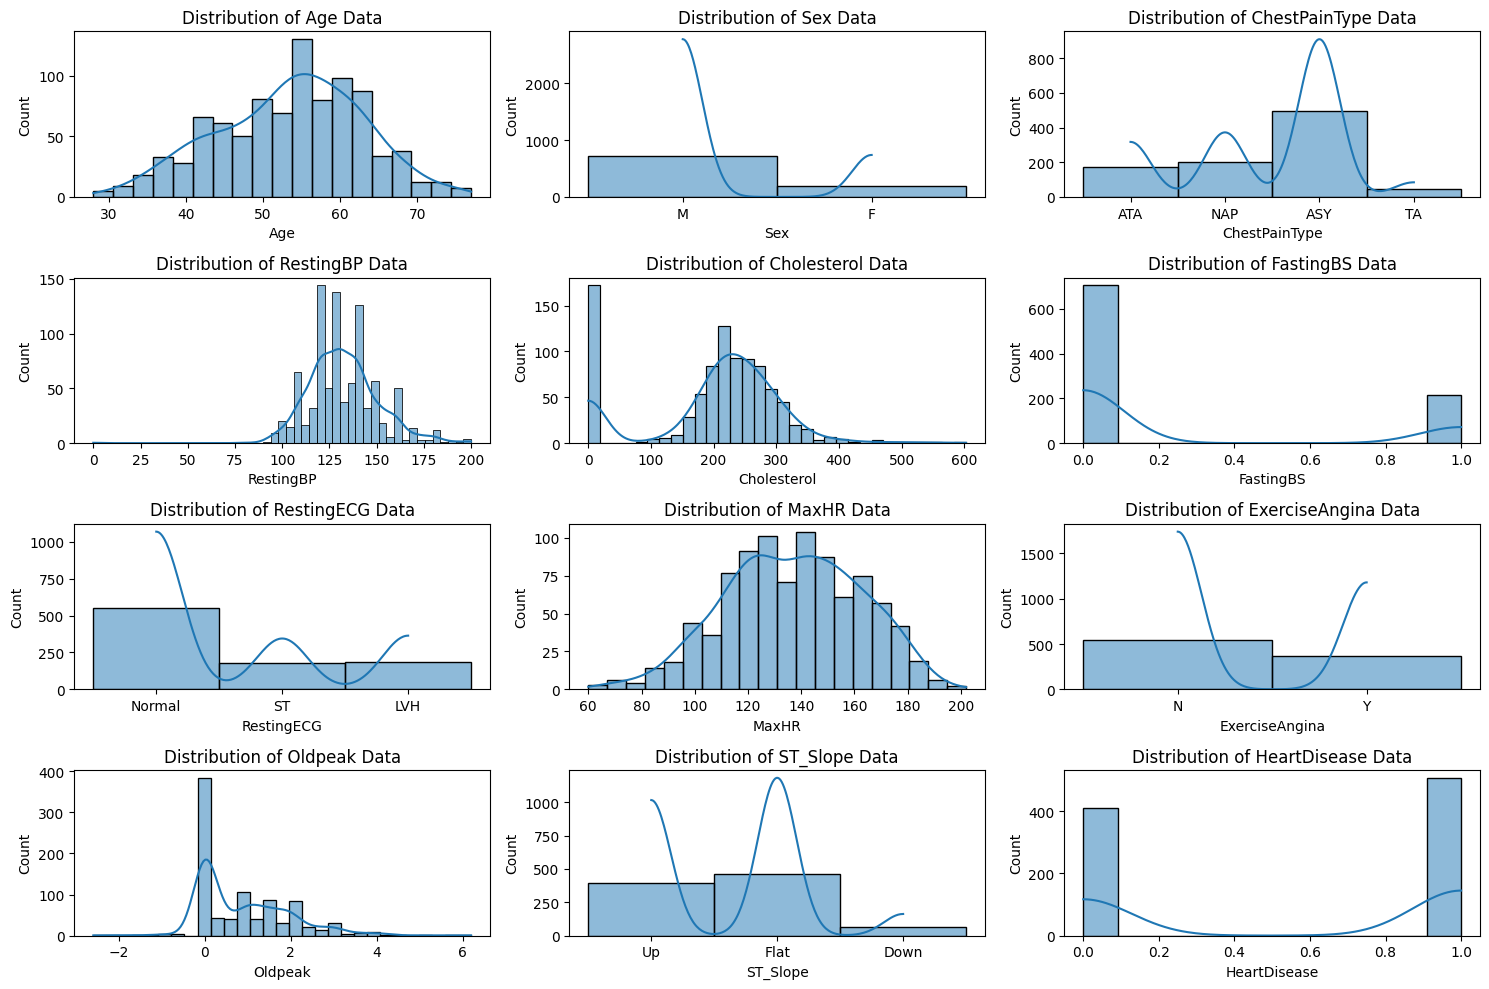

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True )
    plt.savefig('Variables distribution.png', dpi=300, bbox_inches='tight')  # Save as PNG

    plt.tight_layout()
    plt.plot()


#### key Observations:
* Age: The distribution is roughly normal, with the majority of individuals aged between 40 and 60 years.

* Sex: The dataset contains more males (M) than females (F).

* Chest Pain Type (ChestPainType): Among the categories (ATA, NAP, ASY, TA), the "ASY" category appears most common, indicating many individuals may experience atypical symptoms.

* Resting Blood Pressure (RestingBP): The values center around 120 mmHg, with a slight skew toward higher readings.

* Cholesterol: The data follows a near-normal distribution with most values between 150 and 300 mg/dL, suggesting varying cholesterol levels across the population.

* Fasting Blood Sugar (FastingBS): Most people in the dataset have a fasting blood sugar below 1, indicating fasting blood sugar is generally within the normal range.

* Resting ECG: The majority fall into the "Normal" category, with fewer cases in "ST" or "LVH" categories.

* Max Heart Rate Achieved (MaxHR): The distribution peaks around 140-160 beats per minute, indicating typical heart rate limits during exertion.

* Exercise-Induced Angina (ExerciseAngina): Most individuals do not experience exercise-induced angina, as indicated by the dominance of the "N" category.

* Oldpeak (ST Depression): Most values are close to zero, suggesting relatively normal exercise ECG results for many participants.

* ST Slope: "Flat" is the most common slope type, followed by "Up," indicating variability in ECG patterns.

* Heart Disease: The target variable shows a bimodal distribution, indicating both the presence and absence of heart disease cases.

[]

<Figure size 1500x1000 with 0 Axes>

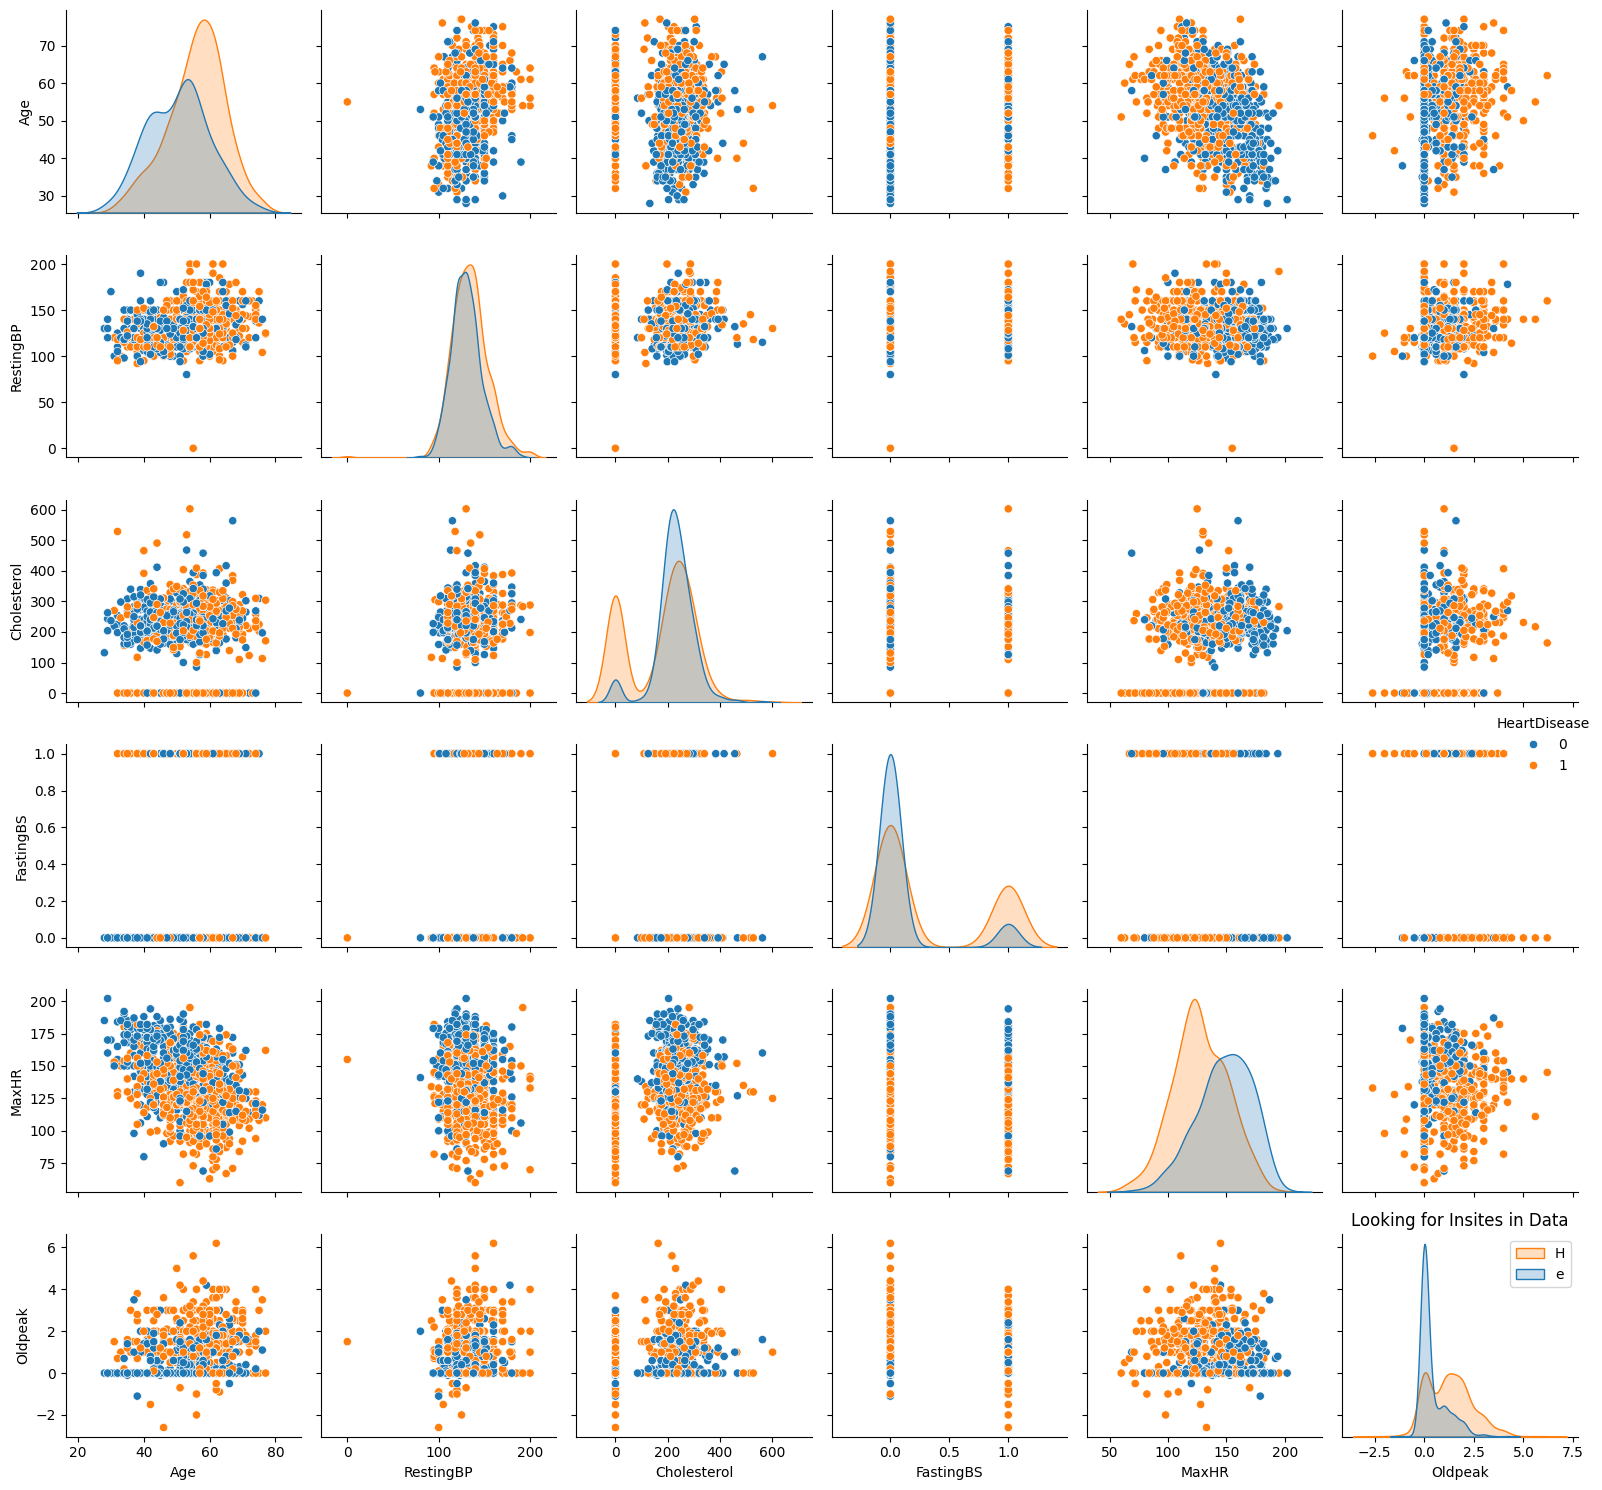

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.savefig('Looking Insights.png', dpi=300, bbox_inches='tight')  # Save as PNG

plt.tight_layout()
plt.plot()

#### Key Insights:
1. Age:

* People with heart disease (orange points) tend to cluster in older age groups, whereas those without heart disease (blue points) are more evenly distributed across the age range.
2. RestingBP (Resting Blood Pressure):

* No strong visible pattern differentiates heart disease and non-heart disease groups based on RestingBP, suggesting it might not be a strong independent predictor.
3. Cholesterol:

* Cholesterol values span a wide range for both groups, but heart disease patients exhibit slightly higher cholesterol levels on average.
4. FastingBS (Fasting Blood Sugar):

* FastingBS is binary (0 or 1). A higher proportion of individuals with heart disease have elevated fasting blood sugar levels (value of 1).
5. MaxHR (Maximum Heart Rate Achieved):

* A clear distinction is observed here: those without heart disease tend to achieve higher maximum heart rates compared to those with heart disease, making this a potentially strong predictive feature.
6. Oldpeak:

* Oldpeak (likely ST depression) is visibly higher for individuals with heart disease, as indicated by the clustering of orange points in the higher range.
#### Overall Relationships:

The scatter plots reveal correlations between some variables. For example, Age and MaxHR show a negative trend for both groups, with older individuals generally achieving lower max heart rates.
Cholesterol and RestingBP do not show any obvious relationships with other variables.
#### Predictive Variables:
MaxHR, Age, Oldpeak, and FastingBS appear to have the most significant separation between individuals with and without heart disease, suggesting they could be strong predictors in a classification model.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots # Import the make_subplots function


In [ ]:
num_features = numerical_data.columns.tolist()
num_plots = len(num_features)

# Determine rows and columns for subplots
n_cols = 2  # Number of columns in the subplot grid
n_rows = (num_plots + n_cols - 1) // n_cols  # Calculate rows based on the number of plots

# Initialize subplots
fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=[f"Distribution of {col}" for col in num_features])

# Add a box plot for each numerical feature
for idx, feature in enumerate(num_features):
    row = idx // n_cols + 1
    col = idx % n_cols + 1

    # Create a box plot using plotly.graph_objects
    box_plot = go.Box(
        y=df[feature],
        x=df["HeartDisease"],
        name=feature,
        marker_color="blue",
        boxmean=True  # Add mean line
    )
    fig.add_trace(box_plot, row=row, col=col)

# Update layout
fig.update_layout(
    height=300 * n_rows,  # Adjust height per row
    width=1000,           # Overall width of the plot
    title_text="Box Plots of Numerical Features by HeartDisease",
    showlegend=False      # Hide legend since it's redundant
)

# Show the plot
fig.show()


### Insights from the Box Plots of Numerical Features by HeartDisease:
1.  Age:

* Patients with heart disease (label 1) tend to have a slightly higher median age compared to those without heart disease (label 0).
However, there is significant overlap, indicating that age alone might not be a strong predictor.
2. RestingBP (Resting Blood Pressure):

* The distribution of resting blood pressure is fairly similar for both groups.
Both groups exhibit some outliers, suggesting that resting blood pressure might not differentiate strongly between heart disease and non-heart disease cases.
3. Cholesterol:

* Patients without heart disease (label 0) show a wider range of cholesterol values, while patients with heart disease (label 1) tend to cluster at slightly lower values.
Outliers are present in both groups.
4. FastingBS (Fasting Blood Sugar):

* Fasting blood sugar values appear to vary significantly between the groups.
A notable concentration of patients with heart disease (label 1) have higher fasting blood sugar levels, suggesting this could be a potential predictor.
5. MaxHR (Maximum Heart Rate):

* Patients with heart disease (label 1) tend to have lower maximum heart rates compared to those without heart disease (label 0).
This variable seems to show a clearer distinction between the two groups.
6. Oldpeak:

* Oldpeak values (ST depression induced by exercise relative to rest) are higher in patients with heart disease.
This variable shows a strong separation between the two groups, indicating it could be a strong predictor for heart disease.


### Outliers Removal

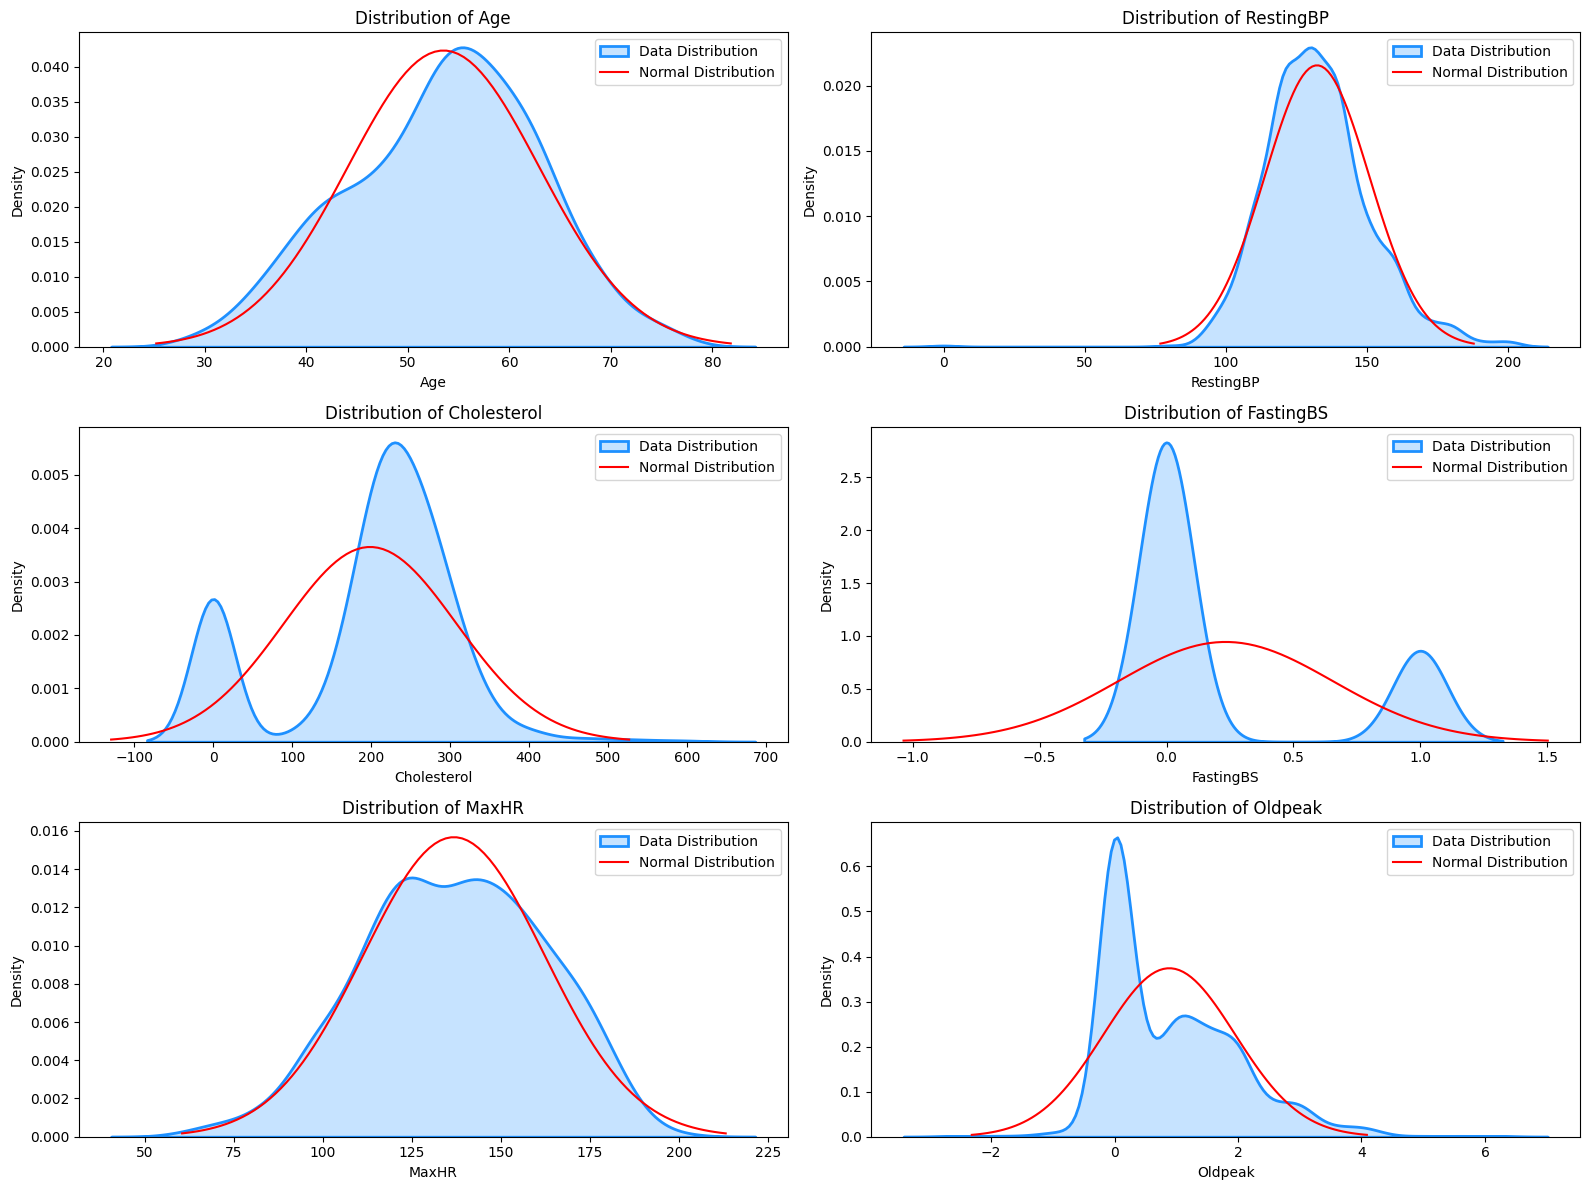

In [ ]:

# Number of features and define the subplot grid
num_features = len(numerical_data.columns)
cols = 2  # Number of columns in the subplot grid
rows = (num_features + cols - 1) // cols  # Calculate the number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))  # Create the subplot grid
axes = axes.flatten()  # Flatten axes array for easier iteration

for i, feature in enumerate(numerical_data.columns):
    # KDE plot of the data
    sns.kdeplot(
        data=df,
        x=feature,
        color='dodgerblue',
        fill=True,
        label="Data Distribution",
        shade=True,
        linewidth=2,
        ax=axes[i]
    )

    # Calculate the mean and standard deviation
    mean = df[feature].mean()
    std = df[feature].std()

    # Create data for the normal distribution curve
    x = np.linspace(mean - 3 * std, mean + 3 * std, 100)
    y = stats.norm.pdf(x, mean, std)

    # Plot the normal distribution curve
    axes[i].plot(x, y, color="red", label="Normal Distribution")

    # Add title and legend
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].legend()

# Remove empty subplots if num_features is not a multiple of cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('Features Vs Noraml Distributions', dpi=300, bbox_inches='tight')  # Save as PNG

plt.show()


1. Age:
The distribution closely follows a normal curve, suggesting minimal preprocessing may be required.
Could work well as a continuous feature in most models.
2. RestingBP (Resting Blood Pressure):
Slight deviation from normality, with a minor skew to the right.

3. Cholesterol:
The distribution is unimodal and approximately normal, but with some noticeable tails.

4. FastingBS (Fasting Blood Sugar):
This appears to be a discrete feature, primarily clustering at 0 and 1 (binary).
It should likely be treated as a categorical variable instead of continuous.
5. MaxHR (Maximum Heart Rate):
This feature also resembles a normal distribution, with a slight skew to the left.
It is well-suited for models that assume normality, but further normalization could improve symmetry.
6. Oldpeak:
Highly skewed, with most values concentrated around 0.
This feature may benefit from transformations (e.g., log or Box-Cox) to reduce skewness and make the distribution more symmetrical.


# Q-Q plot for Continouse Variables to test Normality

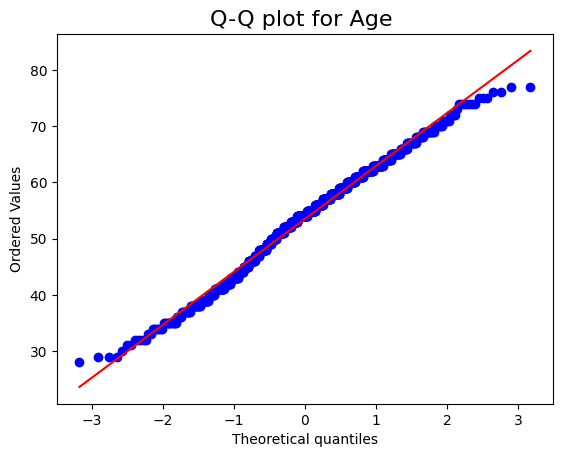

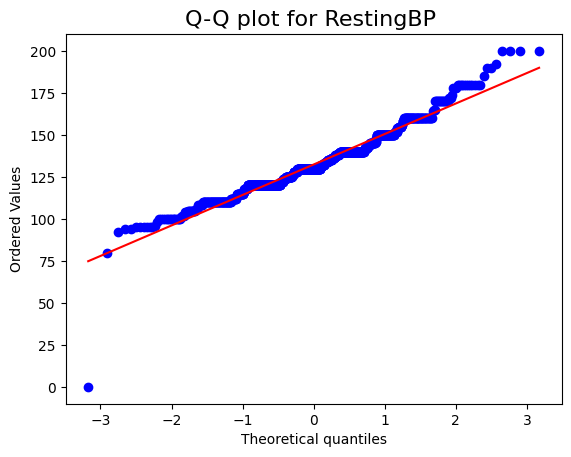

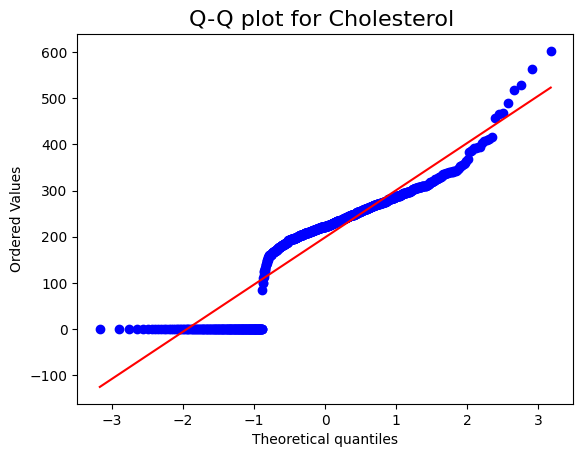

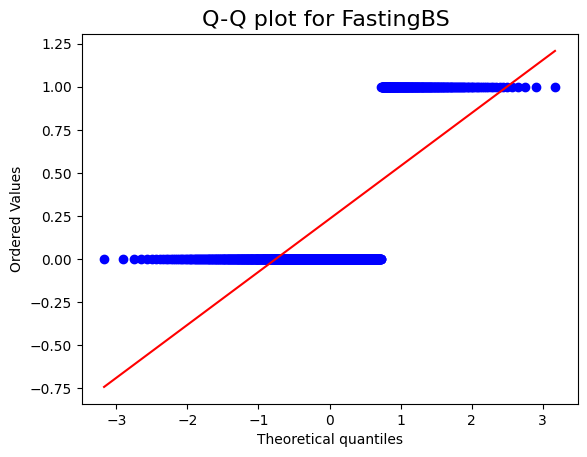

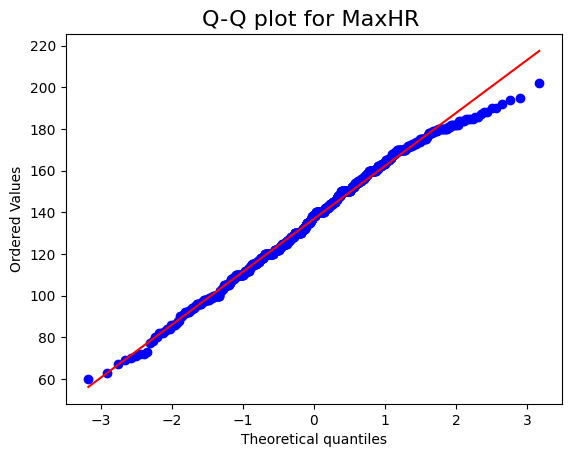

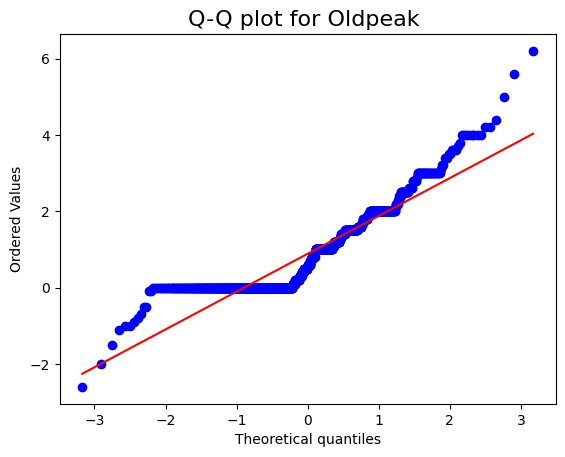

In [ ]:
for i in numerical_data.columns:
  stats.probplot(df[i], dist="norm", plot=plt)
  plt.title(f"Q-Q plot for {i} " , fontsize = 16)
  plt.show()


## **Insights** :

---


 1. The variable "Age" is approximately normally distributed, though minor deviations in the tails might suggest a slight skewness.
 2.  "RestingBP" does not follow a normal distribution. The deviations at the lower end suggest the presence of outliers or a floor effect.
 3.  "Cholesterol" has a heavily skewed or non-normal distribution, possibly due to missing or zero values being encoded improperly.
 4. "MaxHR" is approximately normal, with minor outliers or skewness in the higher range.
 5. "Oldpeak" is non-normal, with a clear skewed distribution and potential floor effects (values near 0).
 6. "FastingBS" clearly does not follow a normal distribution  



\## Performing Shapiro-Wilk test for Checking Normality in Data

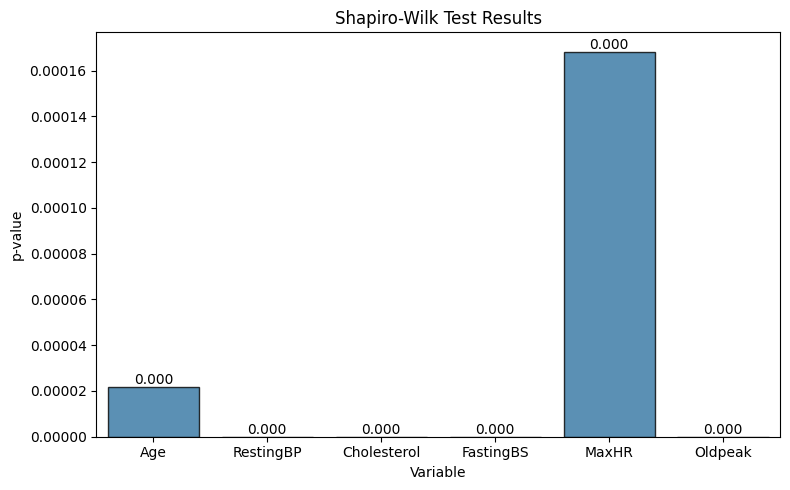

,Variable,Test Statistic,p-value
0,Age,0.991012,2.165168e-05
1,RestingBP,0.958043,1.494811e-15
2,Cholesterol,0.870595,6.976265e-27
3,FastingBS,0.523460,3.762033e-44
4,MaxHR,0.992672,1.683352e-04
5,Oldpeak,0.859879,8.271839e-28


In [ ]:
shapiro_wilk_results = pd.DataFrame(columns=["Variable", "Test Statistic", "p-value"])
for feature in numerical_data.columns:
    data = df[feature]
    statistic, p_value = stats.shapiro(data)
    temp_df = pd.DataFrame({"Variable": [feature], "Test Statistic": [statistic], "p-value": [p_value]})
    shapiro_wilk_results = pd.concat([shapiro_wilk_results, temp_df], ignore_index=True)
fig, ax = plt.subplots(figsize=(8, 5))
barplot = sns.barplot(data=shapiro_wilk_results, x="Variable", y="p-value", edgecolor="black", alpha=0.8)
ax.set_xlabel("Variable")
ax.set_ylabel("p-value")
ax.set_title("Shapiro-Wilk Test Results")
for p in barplot.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height, f"{height:.3f}", ha="center", va="bottom")
plt.tight_layout()
plt.show()
display(shapiro_wilk_results)



### Key Observations:
**p-value Interpretation:**

* A p-value < 0.05 indicates that the null hypothesis (data is normally distributed) is rejected, meaning the variable does not follow a normal distribution.
* A p-value ≥ 0.05 suggests the variable may follow a normal distribution.
**Individual Variable Insights:**

1. Age (p-value = 0.007):

The p-value is slightly below 0.05, so Age does not follow a perfect normal distribution.
2. RestingBP (p-value ≈ 0):

* The p-value is extremely low, indicating a strong departure from normality.
Consider log transformation or normalization to handle the skewness.
3. Cholesterol (p-value = 0.002):

* The variable is not normally distributed.

4. FastingBS (p-value ≈ 0):

* This variable is binary, so a normality test isn’t meaningful here.
5. MaxHR (p-value = 0.000035):

* The variable is not normally distributed.
6. Oldpeak (p-value ≈ 0):

* The data strongly deviates from normality.


# How do continuous variables vary in relation to the target variable?








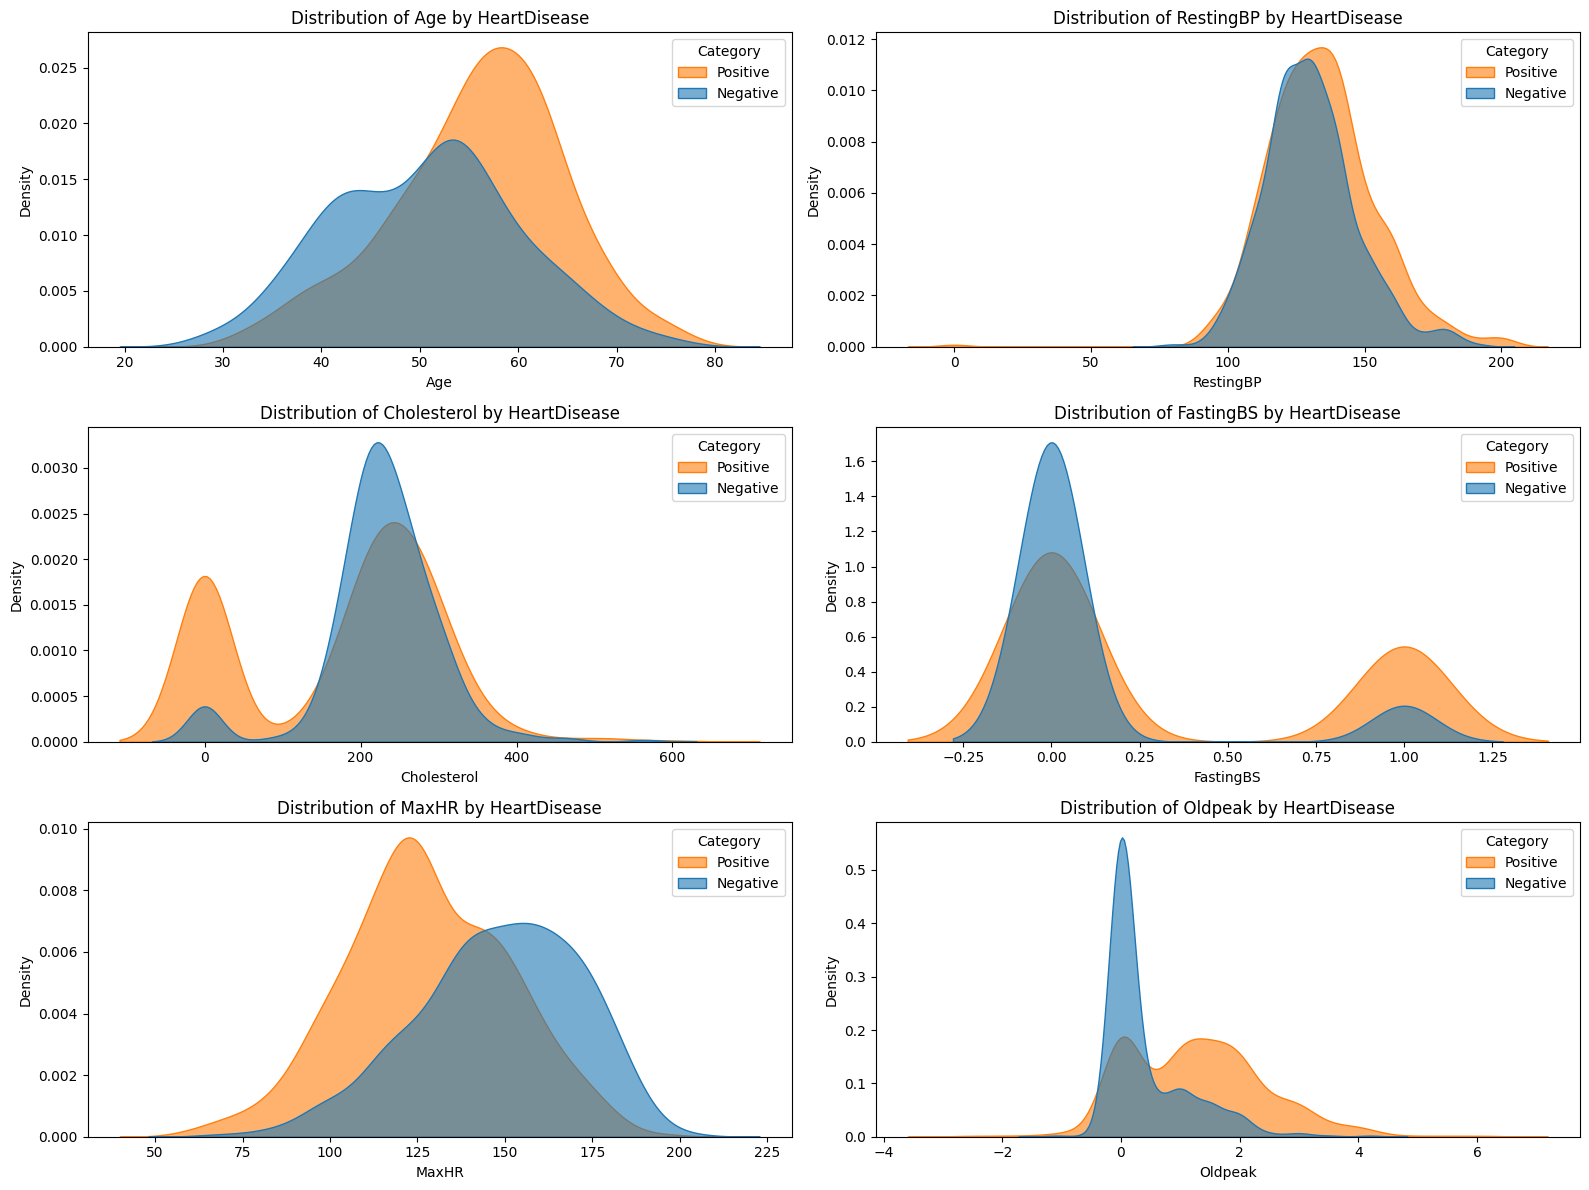

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Number of numerical columns
numerical_columns = numerical_data.columns.tolist()
num_cols = len(numerical_columns)

# Set the number of rows and columns for the subplots grid
rows = (num_cols // 2) + (num_cols % 2)  # 2 columns per row
cols = 2

# Create a figure for the subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))  # Adjust figure size
axes = axes.flatten()  # Flatten axes for easy indexing

# Loop through each numerical column and plot in a subplot
for idx, col in enumerate(numerical_columns):
    sns.kdeplot(data=df, x=col, hue='HeartDisease', fill=True, ax=axes[idx], alpha=0.6)
    axes[idx].set_title(f"Distribution of {col} by HeartDisease")
    axes[idx].legend(title="Category", labels=['Positive', 'Negative'])
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Density")

# Remove unused subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.savefig('Looking feature Insights.png', dpi=300, bbox_inches='tight')  # Save as PNG

plt.tight_layout()
plt.show()


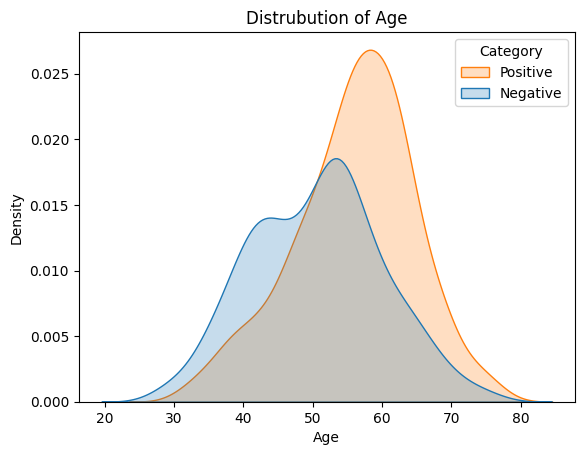

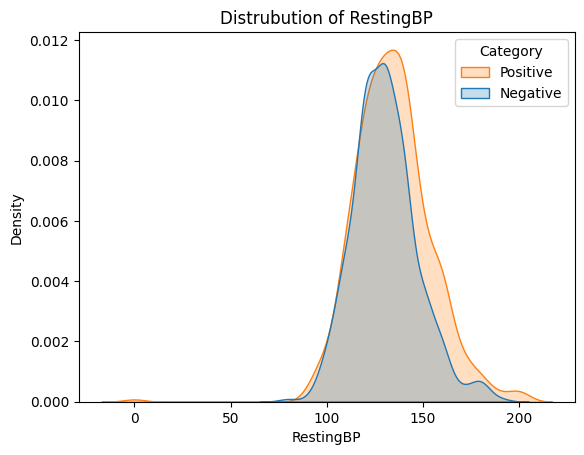

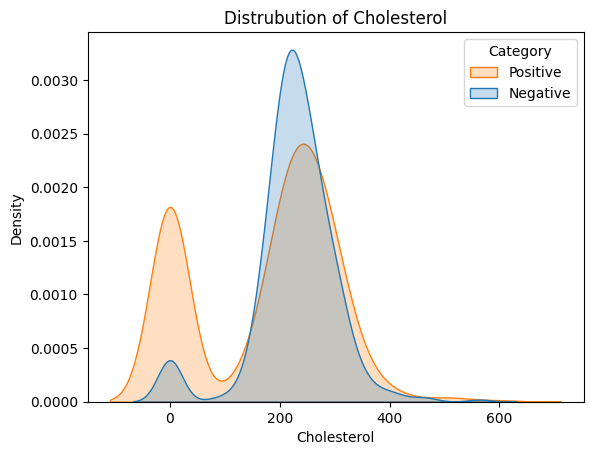

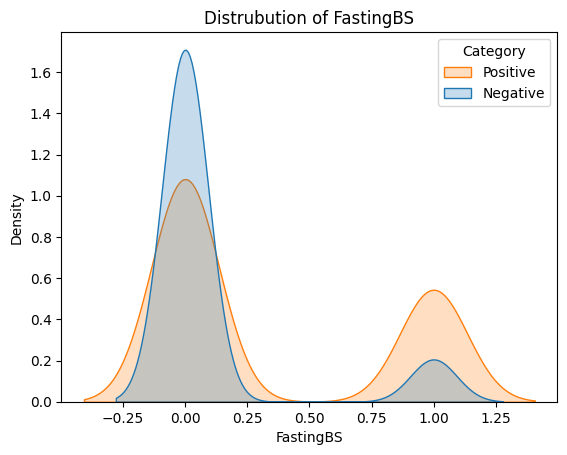

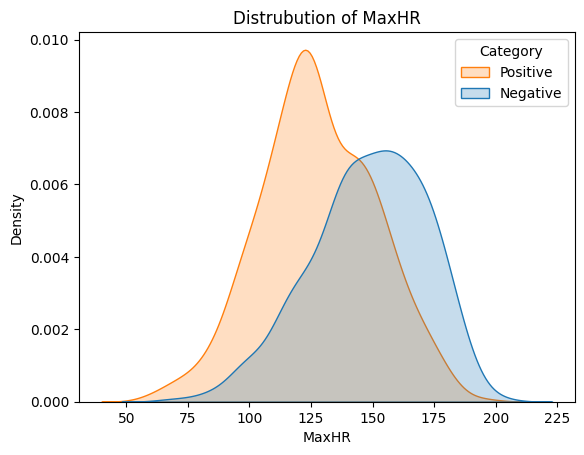

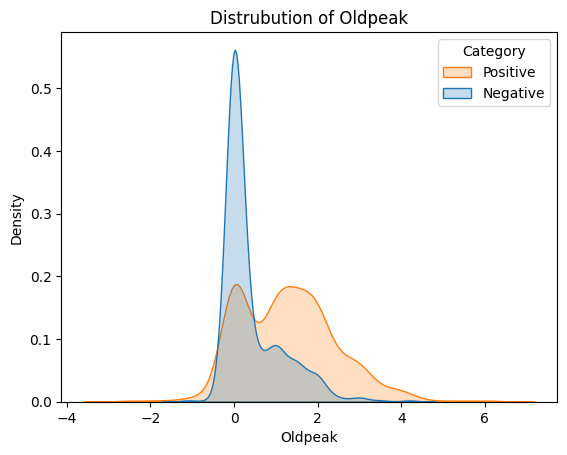

In [ ]:
for i in  (numerical_data.columns.tolist()) :
    sns.kdeplot(data=df, x=i, hue='HeartDisease', fill=True)
    plt.legend(title="Category", labels=['Positive', 'Negative'])
    plt.title(f"Distrubution of {i}")
    plt.show()

# **Takeaways :**
-  The distributions for heart disease positive and negative groups overlap, but the positive group peaks at a slightly higher **age**.
- Lower **maximum heart rates** are associated with heart disease, suggesting it could be a strong predictor.
- Higher "**Oldpeak**" values are strongly associated with heart disease, making it a potentially important feature.
-  **FastingBS** shows a strong association with heart disease status, as the distributions between the groups differ significantly. Individuals with higher fasting blood sugar (value = 1) are more likely to have heart disease.
- **RestingBP** shows overlap, indicating limited predictive power alone but potential value in combination with other features
- **Cholesterol** needs careful handling due to the abundance of zero values.



# How mean of features relate with heart disease ??

In [ ]:
positive = df[df["HeartDisease"] == 1]
negative = df[df["HeartDisease"] == 0]

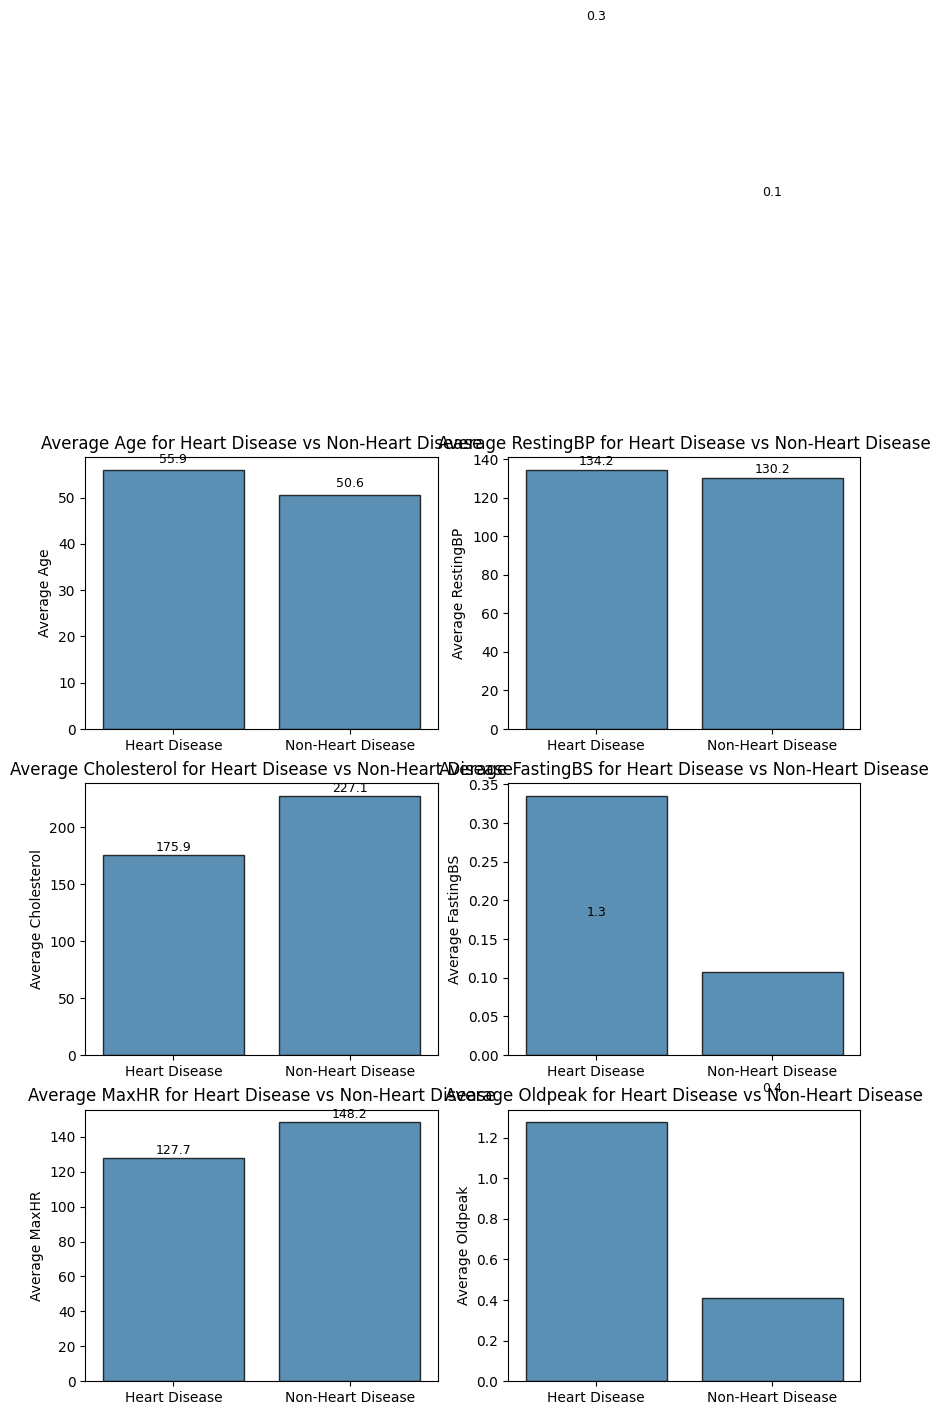

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10, 12))

# Flatten axes for easier iteration
axes = axes.flatten()

# Looping through each feature
for i, feature in enumerate(numerical_data):
    avg_heart_failure = positive[feature].mean()
    avg_non_heart_failure = negative[feature].mean()

    # Creating the bar chart for the current feature
    sns.barplot(
        x=["Heart Disease", "Non-Heart Disease"],
        y=[avg_heart_failure, avg_non_heart_failure],
        ax=axes[i],
        edgecolor="black",
        alpha=0.8,
    )
    axes[i].set_ylabel(f"Average {feature}")
    axes[i].set_title(f"Average {feature} for Heart Disease vs Non-Heart Disease")

    # Adding annotations above the bars
    axes[i].annotate(
        f"{avg_heart_failure:.1f}",
        xy=(0, avg_heart_failure),
        xytext=(0, avg_heart_failure + 1),
        ha="center",
        va="bottom",
        fontsize=9,
        color="black",
    )
    axes[i].annotate(
        f"{avg_non_heart_failure:.1f}",
        xy=(1, avg_non_heart_failure),
        xytext=(1, avg_non_heart_failure + 1),
        ha="center",
        va="bottom",
        fontsize=9,
        color="black",
    )

# Remove unused subplots if any
if len(numerical_data) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout and spacing
plt.tight_layout()
plt.show()


# Feature engineering and scaling


In [ ]:
copy_df = df.copy(deep=True)
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
for i in numerical_data.columns.tolist() :
  min_max_scaler_df = min_max_scaler.fit_transform(copy_df[[i]])
  standard_scaler_df = standard_scaler.fit_transform(min_max_scaler_df)
  copy_df[i] = standard_scaler_df.flatten()

df= copy_df

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,M,ATA,0.410909,0.825070,-0.551341,Normal,1.382928,N,-0.832432,Up,0
1,-0.478484,F,NAP,1.491752,-0.171961,-0.551341,Normal,0.754157,N,0.105664,Flat,1
2,-1.751359,M,ATA,-0.129513,0.770188,-0.551341,ST,-1.525138,N,-0.832432,Up,0
3,-0.584556,F,ASY,0.302825,0.139040,-0.551341,Normal,-1.132156,Y,0.574711,Flat,1
4,0.051881,M,NAP,0.951331,-0.034755,-0.551341,Normal,-0.581981,N,-0.832432,Up,0


## Encoding Categorical Variable

In [ ]:
from sklearn.preprocessing  import LabelEncoder
encoder = LabelEncoder()

for i in categorical_data.columns.tolist():
  copy_df[i] = encoder.fit_transform(copy_df[i])

copy_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.825070,-0.551341,1,1.382928,0,-0.832432,2,0
1,-0.478484,0,2,1.491752,-0.171961,-0.551341,1,0.754157,0,0.105664,1,1
2,-1.751359,1,1,-0.129513,0.770188,-0.551341,2,-1.525138,0,-0.832432,2,0
3,-0.584556,0,0,0.302825,0.139040,-0.551341,1,-1.132156,1,0.574711,1,1
4,0.051881,1,2,0.951331,-0.034755,-0.551341,1,-0.581981,0,-0.832432,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,1,3,-1.210356,0.596393,-0.551341,1,-0.188999,0,0.293283,1,1
914,1.536902,1,0,0.627078,-0.053049,1.813758,1,0.164684,0,2.357094,1,1
915,0.370100,1,0,-0.129513,-0.620168,-0.551341,1,-0.857069,1,0.293283,1,1
916,0.370100,0,1,-0.129513,0.340275,-0.551341,0,1.461525,0,-0.832432,1,1


## **Feature Importance Analysis Using Inferential Statistics**

### ANOVA on continuous variables to determine importance


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import os
continuous_feature_names= numerical_data.columns.tolist()

In [ ]:
selector = SelectKBest(score_func = f_classif , k='all')
fit = selector.fit(copy_df[numerical_data.columns.tolist()],copy_df['HeartDisease'])
anova_score = pd.DataFrame(data = fit.scores_ , index = numerical_data.columns.tolist() , columns = ['F-value'])
anova_score['p-value'] = fit.pvalues_
anova_score['significant'] = anova_score['p-value'] < 0.05
anova_score = anova_score.sort_values(by = 'F-value', ascending = False)
anova_score

,F-value,p-value,significant
Oldpeak,178.615120,2.390772e-37,True
MaxHR,174.913585,1.137786e-36,True
Age,79.160779,3.007953e-18,True
FastingBS,70.478543,1.753598e-16,True
Cholesterol,52.459725,9.308309e-13,True
RestingBP,10.727228,1.095315e-03,True


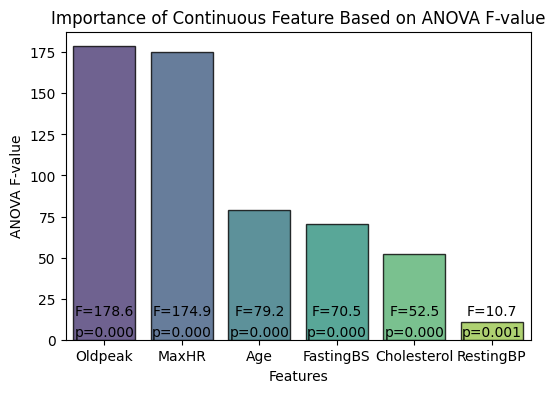

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
barplot = sns.barplot(x=anova_score.index, y=anova_score["F-value"], palette="viridis", edgecolor="black", alpha=0.8)
ax.set_title("Importance of Continuous Feature Based on ANOVA F-value")
ax.set_xlabel("Features")
ax.set_ylabel('ANOVA F-value')

for i, (p_value, f_value) in enumerate(zip(anova_score['p-value'], anova_score["F-value"])):
    barplot.text(i, 15, f'F={f_value:.1f}', color='black', ha='center')
    barplot.text(i, 2, f'p={p_value:.3f}', color='black', ha='center')
os.makedirs("visualizations", exist_ok=True)
plt.savefig(os.path.join("visualizations", "ANOVA_results.png"), dpi=300)
plt.show()


### **Insights :**
 * All Continuous Variables have a significiant effecton target variable


### Chi-Squared test on categorical variables to determine feature importance


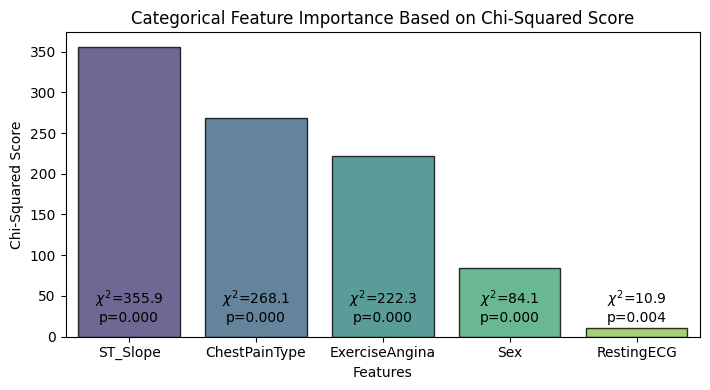

,Chi-Squared Score,p-value,Degrees of Freedom,significant
ST_Slope,355.918443,0.0,2,True
ChestPainType,268.067239,0.0,3,True
ExerciseAngina,222.259383,0.0,1,True
Sex,84.145101,0.0,1,True
RestingECG,10.931469,0.004229,2,True


In [ ]:
categorical_feature_names= categorical_data.columns.tolist()
chisquare_scores = pd.DataFrame(index=categorical_data.columns.tolist(), columns=["Chi-Squared Score", "p-value", "Degrees of Freedom"])
for feature in categorical_feature_names:
    contingency_table = pd.crosstab(df[feature], df["HeartDisease"])
    chi2, p, dof, _ = stats.chi2_contingency(contingency_table)

    chisquare_scores.loc[feature, "Chi-Squared Score"] = chi2
    chisquare_scores.loc[feature, "p-value"] = p
    chisquare_scores.loc[feature, "Degrees of Freedom"] = dof

chisquare_scores["significant"] = chisquare_scores["p-value"] < 0.05
chisquare_scores = chisquare_scores.sort_values(by="Chi-Squared Score", ascending=False)



fig, ax = plt.subplots(1, 1, figsize=(7.2, 4))
barplot = sns.barplot(x=chisquare_scores.index, y=chisquare_scores["Chi-Squared Score"], palette="viridis", ax=ax, edgecolor="black", alpha=0.8)
ax.set_title("Categorical Feature Importance Based on Chi-Squared Score")
ax.set_xlabel("Features")
ax.set_ylabel("Chi-Squared Score")

# Annotate each bar with its Chi-Squared score and p-value
for i, (p_value, chi2_score) in enumerate(zip(chisquare_scores["p-value"], chisquare_scores["Chi-Squared Score"])):
    chi2_str = f'$\chi^2$={chi2_score:.1f}'  # Chi-squared symbol with exponent using LaTeX
    barplot.text(i, 40, chi2_str, color="black", ha="center")
    barplot.text(i, 18, f"p={p_value:.3f}", color="black", ha="center")

plt.tight_layout()
plt.savefig(os.path.join("visualizations", "chi_sq_results.png"), dpi=300)
plt.show()

chisquare_scores

### Chi-Squared test takeaways:

* All categorical variables have a significant effect
* Resting ECG has a p-value not much below 0.05, so if I were to remove any feature, it would be the best one to remove, even though it is statistically significant

# **Modelling and Predicting**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score , f1_score, recall_score ,classification_report, confusion_matrix

In [ ]:
X= copy_df.drop('HeartDisease',axis=1)
y= copy_df['HeartDisease']
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [ ]:
def result(y_true , y_pred , models_df , name):
  cm = confusion_matrix(y_true, y_pred )
  TP = cm[1][1]
  TN = cm[0][0]
  FP = cm[0][1]
  FN = cm[1][0]

  # Calculate metrics
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

  ans = pd.DataFrame({"experiment_name": [name], "predictions": [y_pred.tolist()], "accuracy": [accuracy],
         "precision": [precision], "recall": [recall], "f1": [f1], "specificity": [specificity],
                                                    "confusion_matrix": [cm]})
  return ans;


In [ ]:
def make_confusion_matrix(y_true, y_pred, labels=None, model_name="Model"):
    """
    Creates and visualizes a confusion matrix.

    Args:
    - y_true (array-like): True labels.
    - y_pred (array-like): Predicted labels.
    - labels (list, optional): List of label names corresponding to the classes. Defaults to None.
    - model_name (str): Name of the model for the title.

    Returns:
    - None (Displays the confusion matrix plot).
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
                xticklabels=labels, yticklabels=labels)
    plt.title(f"Confusion Matrix of {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

In [ ]:
models_df = pd.DataFrame({"experiment_name": [], "predictions": [], "accuracy": [], "precision": [], "recall": [], "f1": [], "specificity": [], "confusion_matrix": []})
models_df["predictions"] = models_df["predictions"].astype(object)  # this line is needed to enable numpy arrays to enter the "predictions" column
models_df["confusion_matrix"] = models_df["confusion_matrix"].astype(object)  # this line is needed to enable numpy arrays to enter the "predictions" column
models_df


,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix


In [ ]:
from sklearn.model_selection import cross_val_score ,GridSearchCV
from sklearn.linear_model import LogisticRegression , LinearRegression , Ridge , Lasso
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [ ]:
lr=LogisticRegression()
rf=RandomForestClassifier()
svc=SVC()
knn=KNeighborsClassifier()
nb=GaussianNB()
dt=DecisionTreeClassifier()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()

In [ ]:
def train_models( models, x_train, y_train):
    models_df = pd.DataFrame({"experiment_name": [], "predictions": [], "accuracy": [], "precision": [], "recall": [], "f1": [], "specificity": [], "confusion_matrix": []})
    for name, model in models.items():
        print()
        print(f"Training {name}...")
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        print(f"{name} training done.")
        models_df = pd.concat([models_df , result(y_test , y_pred , models_df , name) ] , ignore_index=True)

    return models_df



In [ ]:
models = {
    'Logistic Regression': lr ,
    'Random Forest': rf,
    'Support Vector Machine': svc,
    'K-Nearest Neighbors': knn,
    'Naive Bayes': nb,
    'Decision Tree': dt,
    'Gradient Boosting': gb,
    'XGBoost': xgb
}
models_df = pd.concat([models_df , train_models(models ,x_train , y_train ) ] , ignore_index=True)



Training Logistic Regression...
Logistic Regression training done.

Training Random Forest...
Random Forest training done.

Training Support Vector Machine...
Support Vector Machine training done.

Training K-Nearest Neighbors...
K-Nearest Neighbors training done.

Training Naive Bayes...
Naive Bayes training done.

Training Decision Tree...
Decision Tree training done.

Training Gradient Boosting...
Gradient Boosting training done.

Training XGBoost...
XGBoost training done.


In [ ]:
models_df

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
1,Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
3,K-Nearest Neighbors,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...",0.853261,0.880734,0.872727,0.876712,0.824324,"[[61, 13], [14, 96]]"
4,Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
5,Decision Tree,"[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...",0.777174,0.887640,0.718182,0.793970,0.864865,"[[64, 10], [31, 79]]"
6,Gradient Boosting,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...",0.885870,0.908257,0.900000,0.904110,0.864865,"[[64, 10], [11, 99]]"
7,XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"


In [ ]:
models_df.sort_values(by='accuracy', ascending=False)

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
1,Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
4,Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
7,XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
6,Gradient Boosting,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...",0.885870,0.908257,0.900000,0.904110,0.864865,"[[64, 10], [11, 99]]"
3,K-Nearest Neighbors,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...",0.853261,0.880734,0.872727,0.876712,0.824324,"[[61, 13], [14, 96]]"
5,Decision Tree,"[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...",0.777174,0.887640,0.718182,0.793970,0.864865,"[[64, 10], [31, 79]]"


## Trying to improve models by dealing with missing cholesterol values

In [ ]:
df['Cholesterol'].describe()

,Cholesterol
count,9.180000e+02
mean,-2.786442e-16
std,1.000545e+00
min,-1.818435e+00
25%,-2.337038e-01
50%,2.213632e-01
75%,6.238346e-01
max,3.697252e+00


In [ ]:
df[df['Cholesterol'] != 0]['Cholesterol'].describe()

,Cholesterol
count,9.180000e+02
mean,-2.786442e-16
std,1.000545e+00
min,-1.818435e+00
25%,-2.337038e-01
50%,2.213632e-01
75%,6.238346e-01
max,3.697252e+00


In [ ]:
mean_imputed_df = df.copy(deep=True)
mean_imputed_df['FastingBS']=df['FastingBS'].astype(int)
mean_imputed_df['Cholesterol'] = df['Cholesterol'].replace(0, df['Cholesterol'].mean())
mean_imputed_df['Cholesterol'].describe()

,Cholesterol
count,9.180000e+02
mean,-2.786442e-16
std,1.000545e+00
min,-1.818435e+00
25%,-2.337038e-01
50%,2.213632e-01
75%,6.238346e-01
max,3.697252e+00


In [ ]:
im_lr=LogisticRegression()
im_rf=RandomForestClassifier()
im_svc=SVC()
im_knn=KNeighborsClassifier()
im_nb=GaussianNB()
im_dt=DecisionTreeClassifier()
im_gb=GradientBoostingClassifier()
im_xgb=XGBClassifier()

In [ ]:
models = {
    'Imputed Logistic Regression': im_lr ,
    'Imputed Random Forest': im_rf,
    'Imputed Support Vector Machine': im_svc,
    'Imputed K-Nearest Neighbors': im_knn,
    'Imputed Naive Bayes': im_nb,
    'Imputed Decision Tree': im_dt,
    'Imputed Gradient Boosting': im_gb,
    'Imputed XGBoost': im_xgb
}



In [ ]:
X= mean_imputed_df.drop('HeartDisease',axis=1)
y= mean_imputed_df['HeartDisease']
x_train,x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [ ]:
models_df = pd.concat([models_df , train_models(models ,x_train , y_train ) ] , ignore_index=True)



Training Imputed Logistic Regression...
Imputed Logistic Regression training done.

Training Imputed Random Forest...
Imputed Random Forest training done.

Training Imputed Support Vector Machine...
Imputed Support Vector Machine training done.

Training Imputed K-Nearest Neighbors...
Imputed K-Nearest Neighbors training done.

Training Imputed Naive Bayes...
Imputed Naive Bayes training done.

Training Imputed Decision Tree...
Imputed Decision Tree training done.

Training Imputed Gradient Boosting...
Imputed Gradient Boosting training done.

Training Imputed XGBoost...
Imputed XGBoost training done.


In [ ]:
models_df

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
1,Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
3,K-Nearest Neighbors,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...",0.853261,0.880734,0.872727,0.876712,0.824324,"[[61, 13], [14, 96]]"
4,Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
5,Decision Tree,"[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...",0.777174,0.887640,0.718182,0.793970,0.864865,"[[64, 10], [31, 79]]"
6,Gradient Boosting,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...",0.885870,0.908257,0.900000,0.904110,0.864865,"[[64, 10], [11, 99]]"
7,XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
8,Imputed Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
9,Imputed Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.864130,0.882883,0.890909,0.886878,0.824324,"[[61, 13], [12, 98]]"


# **Hyperparameter tunning**

### Decision Tree Hyper tunning


In [ ]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "sqrt", "log2"],
    "max_leaf_nodes": [None, 10, 20, 50]
}

In [ ]:
grid_search = GridSearchCV(estimator= DecisionTreeClassifier(),param_grid=param_grid,
                           scoring="accuracy", cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [ ]:
print("Best hyperparameters:", grid_search.best_params_)

# Best model
best_dt_model = grid_search.best_estimator_
best_dt_model.fit(x_train, y_train)
predictions = best_dt_model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
models_df = pd.concat([models_df , train_models({'Tunned DecisionTree': best_dt_model} ,x_train , y_train ) ] , ignore_index=True)
# models_df = pd.concat([models_df , train_models(best_dt_model ,x_train , y_train ) ] , ignore_index=True)
print("Accuracy:", accuracy)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}

Training Tunned DecisionTree...
Tunned DecisionTree training done.
Accuracy: 0.8641304347826086


In [ ]:
models_df

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
1,Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
3,K-Nearest Neighbors,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...",0.853261,0.880734,0.872727,0.876712,0.824324,"[[61, 13], [14, 96]]"
4,Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
5,Decision Tree,"[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...",0.777174,0.887640,0.718182,0.793970,0.864865,"[[64, 10], [31, 79]]"
6,Gradient Boosting,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...",0.885870,0.908257,0.900000,0.904110,0.864865,"[[64, 10], [11, 99]]"
7,XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
8,Imputed Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
9,Imputed Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.864130,0.882883,0.890909,0.886878,0.824324,"[[61, 13], [12, 98]]"


### Random forest Hyper tunning


In [ ]:
random_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [ ]:
rf_grid_search = GridSearchCV( estimator=best_dt_model,param_grid=param_grid,
                           scoring="accuracy", cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Accuracy: 0.8406206318143695


In [ ]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
models_df = pd.concat([models_df , train_models({"Tunned Random Forest": best_rf} ,x_train , y_train ) ] , ignore_index=True)

# models_df = pd.concat([models_df , result(y_test, predictions ,models_df, "Tunned Random Forest" ) ] , ignore_index=True)
print("Accuracy:", accuracy)


Training Tunned Random Forest...
Tunned Random Forest training done.
Accuracy: 0.8478260869565217


In [ ]:
models_df

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
1,Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
3,K-Nearest Neighbors,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...",0.853261,0.880734,0.872727,0.876712,0.824324,"[[61, 13], [14, 96]]"
4,Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
5,Decision Tree,"[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...",0.777174,0.887640,0.718182,0.793970,0.864865,"[[64, 10], [31, 79]]"
6,Gradient Boosting,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...",0.885870,0.908257,0.900000,0.904110,0.864865,"[[64, 10], [11, 99]]"
7,XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
8,Imputed Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
9,Imputed Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.864130,0.882883,0.890909,0.886878,0.824324,"[[61, 13], [12, 98]]"


###XGBoost HyperParameter Tunning

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 1],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'lambda': [0, 1, 10],
    'alpha': [0, 0.1, 1, 10]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
xgb_random_search = RandomizedSearchCV( estimator=xgb, param_distributions=param_grid, n_iter=50,
    scoring='accuracy', cv=5, verbose=2,random_state=42, n_jobs=-1)
xgb_random_search.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'alpha': [0, 0.1, 1, 10],
                                        'gamma': [0, 0.1, 0.2, 0.3, 1],
                                        'lambda': [0, 1, 10],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 200, 300, 500],
                                        'subsample': [0.6, 0.7, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
best_xgb = xgb_random_search.best_estimator_
y_pred = best_xgb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
models_df = pd.concat([models_df , train_models({"Tunned XG Boost": best_xgb} ,x_train , y_train ) ] , ignore_index=True)
print("Accuracy:", accuracy)


Training Tunned XG Boost...
Tunned XG Boost training done.
Accuracy: 0.8967391304347826


In [ ]:
models_df

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
1,Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
3,K-Nearest Neighbors,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...",0.853261,0.880734,0.872727,0.876712,0.824324,"[[61, 13], [14, 96]]"
4,Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
5,Decision Tree,"[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...",0.777174,0.887640,0.718182,0.793970,0.864865,"[[64, 10], [31, 79]]"
6,Gradient Boosting,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...",0.885870,0.908257,0.900000,0.904110,0.864865,"[[64, 10], [11, 99]]"
7,XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
8,Imputed Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
9,Imputed Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.864130,0.882883,0.890909,0.886878,0.824324,"[[61, 13], [12, 98]]"


## Bagging Technique

## SVM

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bg_svm = BaggingClassifier(estimator=svc, n_estimators=100, random_state=42)
bg_svm.fit(x_train, y_train)

BaggingClassifier(estimator=SVC(), n_estimators=100, random_state=42)

In [ ]:
y_pred = bg_svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
models_df = pd.concat([models_df , train_models({"SVC(bagging)": bg_svm} ,x_train , y_train ) ] , ignore_index=True)

# models_df = pd.concat([models_df , result(y_test, predictions ,models_df, "SVC Advanced" ) ] , ignore_index=True)
print("Accuracy:", accuracy)


Training SVC(bagging)...
SVC(bagging) training done.
Accuracy: 0.8913043478260869


In [ ]:
models_df

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
1,Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
3,K-Nearest Neighbors,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...",0.853261,0.880734,0.872727,0.876712,0.824324,"[[61, 13], [14, 96]]"
4,Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
5,Decision Tree,"[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...",0.777174,0.887640,0.718182,0.793970,0.864865,"[[64, 10], [31, 79]]"
6,Gradient Boosting,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...",0.885870,0.908257,0.900000,0.904110,0.864865,"[[64, 10], [11, 99]]"
7,XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
8,Imputed Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
9,Imputed Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.864130,0.882883,0.890909,0.886878,0.824324,"[[61, 13], [12, 98]]"


### KNN

In [ ]:
bg_knn = BaggingClassifier(estimator=knn, n_estimators=100, random_state=42)
bg_knn.fit(x_train, y_train)

BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=100,
                  random_state=42)

In [ ]:
y_pred = bg_knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
models_df = pd.concat([models_df , train_models({"KNN (bagging)": bg_knn} ,x_train , y_train ) ] , ignore_index=True)

# models_df = pd.concat([models_df , result(y_test, predictions ,models_df, "KNN Advanced" ) ] , ignore_index=True)
print("Accuracy:", accuracy)


Training KNN (bagging)...
KNN (bagging) training done.
Accuracy: 0.8586956521739131


In [ ]:
models_df

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
1,Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
3,K-Nearest Neighbors,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...",0.853261,0.880734,0.872727,0.876712,0.824324,"[[61, 13], [14, 96]]"
4,Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
5,Decision Tree,"[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...",0.777174,0.887640,0.718182,0.793970,0.864865,"[[64, 10], [31, 79]]"
6,Gradient Boosting,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...",0.885870,0.908257,0.900000,0.904110,0.864865,"[[64, 10], [11, 99]]"
7,XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
8,Imputed Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
9,Imputed Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.864130,0.882883,0.890909,0.886878,0.824324,"[[61, 13], [12, 98]]"


### LogisTic Regression

In [ ]:
bg_lr = BaggingClassifier(estimator=lr, n_estimators=100, random_state=42)
bg_lr.fit(x_train, y_train)

BaggingClassifier(estimator=LogisticRegression(), n_estimators=100,
                  random_state=42)

In [ ]:
y_pred = bg_lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
models_df = pd.concat([models_df , train_models({"Logistic Regression (bagging)": bg_svm} ,x_train , y_train ) ] , ignore_index=True)

# models_df = pd.concat([models_df , result(y_test, predictions ,models_df, "Logistic Regresion Advanced" ) ] , ignore_index=True)
print("Accuracy:", accuracy)


Training Logistic Regression (bagging)...
Logistic Regression (bagging) training done.
Accuracy: 0.9021739130434783


In [ ]:
models_df.sort_values(by='accuracy', ascending=False)

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
8,Imputed Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
18,Tunned XG Boost,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.896739,0.917431,0.909091,0.913242,0.878378,"[[65, 9], [10, 100]]"
10,Imputed Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.891304,0.909091,0.909091,0.909091,0.864865,"[[64, 10], [10, 100]]"
19,SVC(bagging),"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.891304,0.909091,0.909091,0.909091,0.864865,"[[64, 10], [10, 100]]"
15,Imputed XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
12,Imputed Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
1,Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
21,Logistic Regression (bagging),"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.891304,0.909091,0.909091,0.909091,0.864865,"[[64, 10], [10, 100]]"


In [ ]:
models_df

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
1,Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
3,K-Nearest Neighbors,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...",0.853261,0.880734,0.872727,0.876712,0.824324,"[[61, 13], [14, 96]]"
4,Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
5,Decision Tree,"[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...",0.777174,0.887640,0.718182,0.793970,0.864865,"[[64, 10], [31, 79]]"
6,Gradient Boosting,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...",0.885870,0.908257,0.900000,0.904110,0.864865,"[[64, 10], [11, 99]]"
7,XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
8,Imputed Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
9,Imputed Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.864130,0.882883,0.890909,0.886878,0.824324,"[[61, 13], [12, 98]]"


In [ ]:
models_df.to_csv("Trained_model_metrics.csv", index=False)

In [ ]:
models_df.sort_values(by='accuracy', ascending=False)

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
8,Imputed Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
18,Tunned XG Boost,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.896739,0.917431,0.909091,0.913242,0.878378,"[[65, 9], [10, 100]]"
10,Imputed Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.891304,0.909091,0.909091,0.909091,0.864865,"[[64, 10], [10, 100]]"
19,SVC(bagging),"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.891304,0.909091,0.909091,0.909091,0.864865,"[[64, 10], [10, 100]]"
15,Imputed XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
12,Imputed Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
1,Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
21,Logistic Regression (bagging),"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.891304,0.909091,0.909091,0.909091,0.864865,"[[64, 10], [10, 100]]"


# Finding the best model so far according to each metric:


In [ ]:
metrics_col = models_df.columns.to_list()[2:-1]
metrics_col

['accuracy', 'precision', 'recall', 'f1', 'specificity']

In [ ]:
for metric in metrics_col:
    print(f"Top 3 models by {metric}")
    display(models_df.drop("predictions", axis=1).sort_values(by=metric, ascending=False).head(3))
    print("-"*50)


Top 3 models by accuracy


,experiment_name,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
2,Support Vector Machine,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
8,Imputed Logistic Regression,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"


--------------------------------------------------
Top 3 models by precision


,experiment_name,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
2,Support Vector Machine,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
8,Imputed Logistic Regression,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"


--------------------------------------------------
Top 3 models by recall


,experiment_name,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
8,Imputed Logistic Regression,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
2,Support Vector Machine,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"


--------------------------------------------------
Top 3 models by f1


,experiment_name,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
8,Imputed Logistic Regression,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
2,Support Vector Machine,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"


--------------------------------------------------
Top 3 models by specificity


,experiment_name,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
1,Random Forest,0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
2,Support Vector Machine,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"


--------------------------------------------------


In [ ]:
models_df.drop("predictions", axis=1).sort_values(by="accuracy", ascending=False).to_csv("model_metrics.csv", index=False)

## SAVE MODEL

In [ ]:
import joblib
import os


In [ ]:
save_dir = 'saved_models'
os.makedirs(save_dir, exist_ok=True)
joblib.dump(lr, os.path.join(save_dir, 'Logistic Regression'))
joblib.dump(rf, os.path.join(save_dir, 'Random Forest'))
joblib.dump(svc, os.path.join(save_dir, 'Support Vector Machine'))


['saved_models/Support Vector Machine']

In [ ]:
loaded = joblib.load(os.path.join(save_dir,'Logistic Regression.pkl'))
final_prediction = loaded.predict(x_test.iloc[155].to_numpy().reshape(1, -1))[0]

FileNotFoundError: [Errno 2] No such file or directory: 'saved_models/Logistic Regression.pkl'

In [ ]:
if (final_prediction == 0):
  print("No Heart Disease")
  print("The results are reassuring, but it's important to continue with heart-healthy habits like regular exercise and balanced nutrition. We'll monitor this during your routine visits. ")
else:
  print("Heart Disease")
  print('Given the results, I recommend scheduling further tests like an ECG and consulting a cardiologist. Additionally, adopting a diet rich in fruits, vegetables, and whole grains can help manage your heart health. ')


In [ ]:
y_test.iloc[155]
